# Running pyCapsid using a config.toml file

## Example config.toml
```toml
[PDB]
pdb = '4oq8' # PDB ID of structure
save_all_path = './4oq8' # where to save the results

[CG]
preset = 'U-ENM' # Model Preset To Use
save_hessian = false # Whether to save the hessian matrix

[NMA]
n_modes = 200 # Number of low frequency modes to calculate
eigen_method = 'eigsh' # eigen method to use

[b_factors]
fit_modes = true # Whether to select the number of modes used to maximize correlation

[QRC]

[VIS]
method = 'chimerax'
chimerax_path = 'C:\Program Files\ChimeraX\bin\ChimeraX.exe' # Change to the chimerax executable location for your system

[plotting]

```

## Generating a dummy .toml
Here we use python to generate the above .toml file to test in this notebook. You can also create a toml file and save it using any text editor.

In [2]:
config = {
    "PDB": {
    "pdb": "4oq8",
    "save_all_path": './4oq8',
    },
    "CG": {
    "preset": "U-ENM",
    "save_hessian": False,
    },
    "NMA": {
    "n_modes": 200,
    "eigen_method": 'eigsh',
    } ,
    "b_factors": {
    "fit_modes": True
    } ,
    "QRC": {
    },
    "VIS": {
    "method": "chimerax",
    "chimerax_path": "C:\\Program Files\\ChimeraX\\bin\\ChimeraX.exe",
    },
    "plotting": {
    }
}
import toml

toml_string = toml.dumps(config)  # Output to a string

output_file_name = "config.toml"
with open(output_file_name, "w") as toml_file:
    toml.dump(config, toml_file)

Fetching file 1 / 1 (4oq8)...
Done
Number of protein chains in full structure: 60
Number of protein chains in asymmetric unit: 1
# of residues: 8640
Building hessian for model preset:  U-ENM
Model parameters:  {'cutoff': 7.5, 'gnm': False, 'fanm': 0.1, 'wfunc': 'power', 'base_dist': 1, 'd_power': 0, 'backbone': False, 'k_backbone': 1, 'l_backbone': 1, 'chain_starts': None, 'save_hessian': False, 'save_kirchhoff': False, 'save_cg_path': './4oq8/'}
Finding neighbors within 7.5Å
Building kirchhoff matrix
Building hessian matrix
Done building model
Calculating Normal Modes
Using shift-invert for increased performance with increased memory usage.
NMA time:  17.199893799959682
Saving NMA results in./4oq8/modes.npz


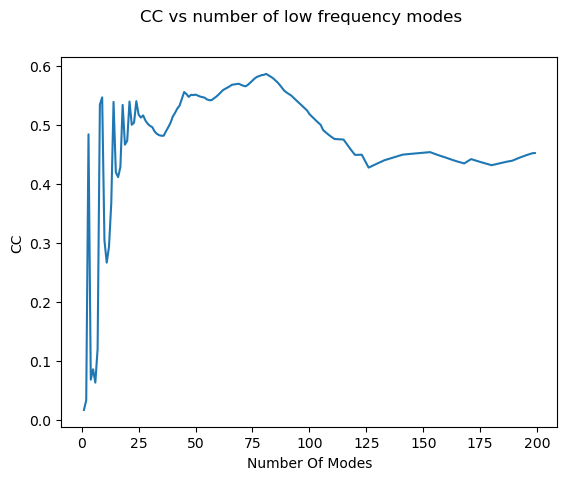

Summary of regression results: predicted squared fluctuations vs B-factors
Model:                    RLM                   Df Residuals:      8639  
Dependent Variable:       B-factors             Norm:              HuberT
Date:                     2023-07-28 11:28      Scale Est.:        mad   
No. Observations:         8640                  Cov. Type:         H1    
Df Model:                 0                     Scale:             1.2155
-------------------------------------------------------------------------
                      Coef.   Std.Err.     z     P>|z|   [0.025   0.975] 
-------------------------------------------------------------------------
Squared Fluctuations 146.9902   0.1033 1422.8555 0.0000 146.7877 147.1926

Number of low-frequency modes used: 80
Scale factor k between predicted fluctuations and B-factors: 1.47e+02±4.05e-01
Estimated spring constant gamma of ENM springs: 1.79e-01±4.93e-04
Saving B-factor results in./4oq8/b_factors.npz


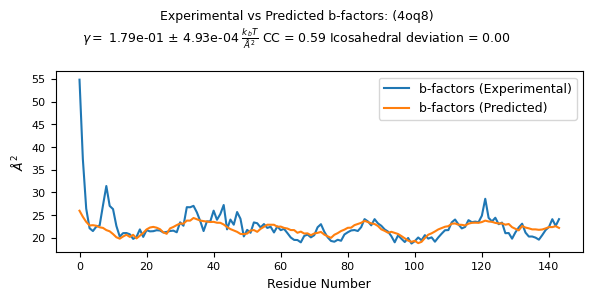

bfactor fitting time:  1.8909455999964848
Calculating sparse covariance matrix
Calculating sparse distance fluctuation matrix from covariance matrix
No cluster range specified, defaulting to: 4-[number of chains]
Performing Spectral Embedding
Clustering Embedded Points
Method: discretize
QRC time:  4.561291899997741
Plotting


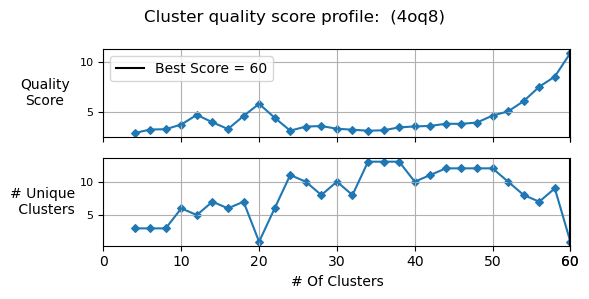

pyCapsid total execution time for 4oq8: 31.596043600002304
Indices of non-degenerate eigenmodes:  [  8  99 105 180]
Including modes up to lowest frequency non-degenerate mode for visualization
""C:\Program Files\ChimeraX\bin\ChimeraX.exe" --script "./4oq8/4oq8_pyCapsid_report/chimerax/chimerax_script_colab.py""


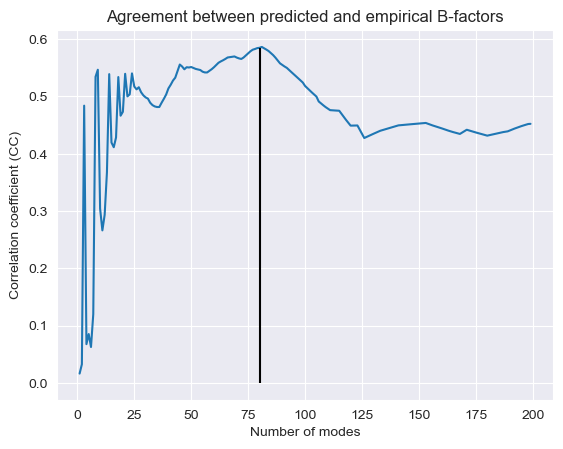

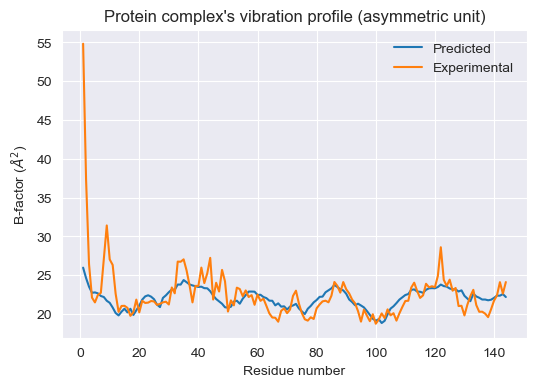

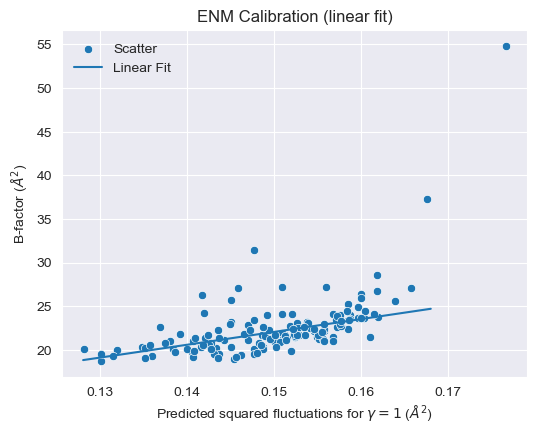

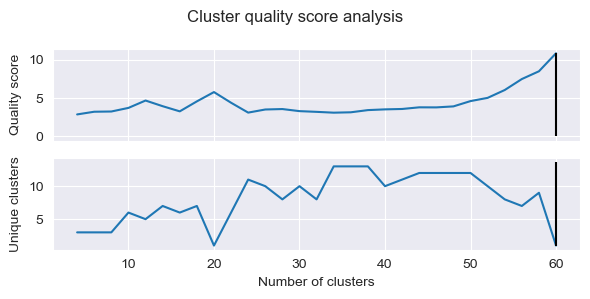

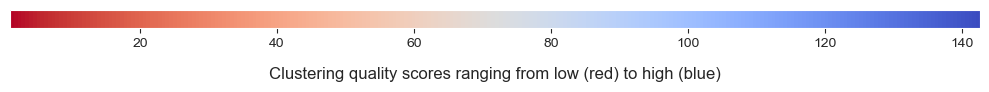

In [3]:
# Nothing is returned if using chimerax
# Using nglview with run_capsid_report is currently unsupported but results can be visualized afterwards as described in the tutorial
from pyCapsid import run_capsid_report
run_capsid_report('config.toml')